## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.25):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.4, 0.5]
NUM =[[512, 256, 128], [512, 256, 128, 64]]

In [10]:
results = {}
for num in NUM:
    for dp in Dropout_EXP:
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num ,drp_ratio=dp)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "Neuro_num:%s, Dropout:%.2f" % (str(num), dp)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 6s 117us/step - loss: 1.1040 - acc: 0.6070 - val_loss: 1.2881 - val_acc: 0.5444
Epoch 50/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.0965 - acc: 0.6102 - val_loss: 1.2839 - val_acc: 0.5500
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
________

Epoch 48/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3085 - acc: 0.5341 - val_loss: 1.3162 - val_acc: 0.5321
Epoch 49/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3025 - acc: 0.5353 - val_loss: 1.3076 - val_acc: 0.5348
Epoch 50/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2918 - acc: 0.5407 - val_loss: 1.3128 - val_acc: 0.5359
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

50000/50000 [==============================] - 6s 117us/step - loss: 1.4711 - acc: 0.4723 - val_loss: 1.4029 - val_acc: 0.4987
Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4799 - acc: 0.4705 - val_loss: 1.3954 - val_acc: 0.5005
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4653 - acc: 0.4743 - val_loss: 1.4016 - val_acc: 0.4991
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4609 - acc: 0.4752 - val_loss: 1.3836 - val_acc: 0.4985
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4603 - acc: 0.4774 - val_loss: 1.3819 - val_acc: 0.5022
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

50000/50000 [==============================] - 8s 158us/step - loss: 1.6104 - acc: 0.4233 - val_loss: 1.4859 - val_acc: 0.4688
Epoch 45/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6001 - acc: 0.4261 - val_loss: 1.4801 - val_acc: 0.4732
Epoch 46/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.6022 - acc: 0.4268 - val_loss: 1.4804 - val_acc: 0.4710
Epoch 47/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5918 - acc: 0.4286 - val_loss: 1.4719 - val_acc: 0.4788
Epoch 48/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5843 - acc: 0.4296 - val_loss: 1.4753 - val_acc: 0.4757
Epoch 49/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5864 - acc: 0.4310 - val_loss: 1.4662 - val_acc: 0.4763
Epoch 50/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.5769 - acc: 0.4325 - val_loss: 1.4554 - val_acc: 0.4832
_____________________________________

Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2010 - acc: 0.5706 - val_loss: 1.3304 - val_acc: 0.5260
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1968 - acc: 0.5747 - val_loss: 1.3180 - val_acc: 0.5339
Epoch 43/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.1880 - acc: 0.5755 - val_loss: 1.3063 - val_acc: 0.5379
Epoch 44/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1759 - acc: 0.5821 - val_loss: 1.2938 - val_acc: 0.5435
Epoch 45/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1670 - acc: 0.5811 - val_loss: 1.3127 - val_acc: 0.5273
Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1599 - acc: 0.5856 - val_loss: 1.2965 - val_acc: 0.5391
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1471 - acc: 0.5899 - val_loss: 1.2878 - val_acc: 0.5442
Epoch 48/50
50000/50000 [==

50000/50000 [==============================] - 6s 122us/step - loss: 1.4511 - acc: 0.4817 - val_loss: 1.3911 - val_acc: 0.5019
Epoch 38/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4374 - acc: 0.4844 - val_loss: 1.3836 - val_acc: 0.5006
Epoch 39/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4341 - acc: 0.4861 - val_loss: 1.3825 - val_acc: 0.5036
Epoch 40/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4334 - acc: 0.4827 - val_loss: 1.3848 - val_acc: 0.5044
Epoch 41/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4224 - acc: 0.4886 - val_loss: 1.3914 - val_acc: 0.4990
Epoch 42/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4141 - acc: 0.4929 - val_loss: 1.3737 - val_acc: 0.5082
Epoch 43/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4065 - acc: 0.4977 - val_loss: 1.3746 - val_acc: 0.5080
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 6s 124us/step - loss: 1.6716 - acc: 0.3936 - val_loss: 1.5463 - val_acc: 0.4474
Epoch 34/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6704 - acc: 0.3963 - val_loss: 1.5331 - val_acc: 0.4563
Epoch 35/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6617 - acc: 0.3979 - val_loss: 1.5345 - val_acc: 0.4571
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6565 - acc: 0.3988 - val_loss: 1.5323 - val_acc: 0.4519
Epoch 37/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6471 - acc: 0.4055 - val_loss: 1.5244 - val_acc: 0.4549
Epoch 38/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6404 - acc: 0.4059 - val_loss: 1.5198 - val_acc: 0.4619
Epoch 39/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6333 - acc: 0.4075 - val_loss: 1.5096 - val_acc: 0.4608
Epoch 40/50
50000/50000 [==============

50000/50000 [==============================] - 7s 131us/step - loss: 1.8751 - acc: 0.2882 - val_loss: 1.7511 - val_acc: 0.3540
Epoch 30/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8631 - acc: 0.2917 - val_loss: 1.7472 - val_acc: 0.3509
Epoch 31/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8644 - acc: 0.2932 - val_loss: 1.7514 - val_acc: 0.3578
Epoch 32/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8577 - acc: 0.2950 - val_loss: 1.7399 - val_acc: 0.3542
Epoch 33/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8498 - acc: 0.2997 - val_loss: 1.7441 - val_acc: 0.3559
Epoch 34/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8511 - acc: 0.2993 - val_loss: 1.7469 - val_acc: 0.3598
Epoch 35/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8449 - acc: 0.3032 - val_loss: 1.7355 - val_acc: 0.3567
Epoch 36/50
50000/50000 [==============

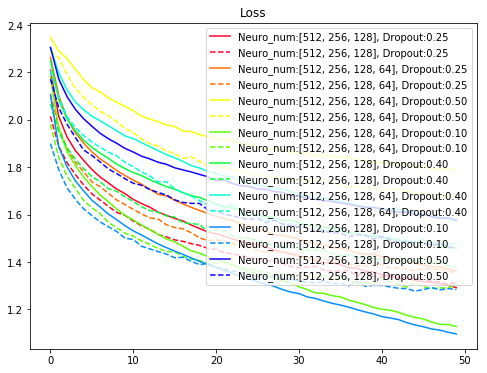

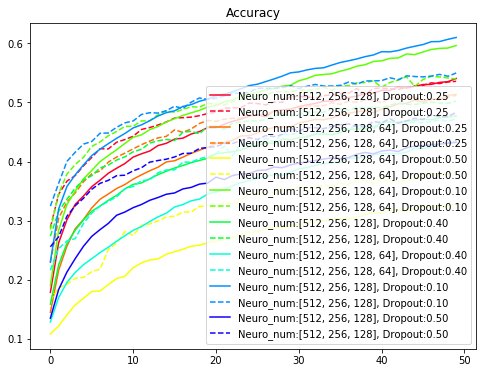

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 10

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
#plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()